# Mathematical exercises

Solutions to the following exercises may be either typed into the submitted Jupyter notebook, or handwritten solutions may be scanned and submitted as a separate PDF file.

1. Exercise 1.6 from the PRML textbook (3 points).
2. Exercise 1.12 from the PRML textbook (3 points).

# Coding exercises

In class, we generated some fake data and fit polynomials to the data. We noticed that higher-order polynomials did a good job of fitting the data, but a poor job of fitting new data that was generated in the same way. This is an example of **overfitting**.

In this assignment, we will use **cross validation** to combat overfitting by selecting a model that optimally describes data that was *not* used to fit the model.

Reminder: Once your notebook is complete, you should restart the kernel, run all of the cells in order, and make sure that no errors occur. Notebooks that run successfully without errors will be awarded one extra credit point.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First, as we did in class, let's make some fake data.


Text(0, 0.5, 'y')

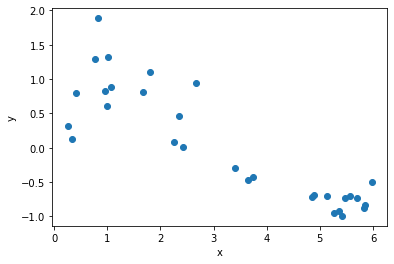

In [2]:
n = 30  # number of data points

# Simulated data:
x_data = 2*np.pi*np.random.rand(n)
noise_amp = 0.3
noise = noise_amp*np.random.randn(n)
y_data = np.sin(x_data) + noise

plt.plot(x_data, y_data, 'o')
plt.xlabel('x')
plt.ylabel('y')

In class, we used the function `np.polyfit()` to fit the data with a polynomial:
$$
\hat{y} = \beta_0 + \beta_1 x + \ldots + \beta_{p-1} x^{p-1}
$$

In [3]:
# A polynomial fit:
p = 12
fit = np.polyfit(x_data, y_data, p)
beta_list = fit[::-1]  # flip the list so that it starts with beta0
print('Polynomial coefficients: \n', beta_list)


# The following function gives us the y value of our fitting curve given the x value:
def yhat(x, beta_list):
    '''
    Given the x value and the list of polynomial coefficients, return the y value.
    '''
    y = 0
    for p in range(len(beta_list)):
        y = y + beta_list[p]*x**p
        
    return y

Polynomial coefficients: 
 [ 1.68902328e+01 -1.76281580e+02  7.16715959e+02 -1.48216770e+03
  1.80647827e+03 -1.40422882e+03  7.27238033e+02 -2.56333095e+02
  6.16864841e+01 -9.96968893e+00  1.03447185e+00 -6.22407800e-02
  1.65033550e-03]


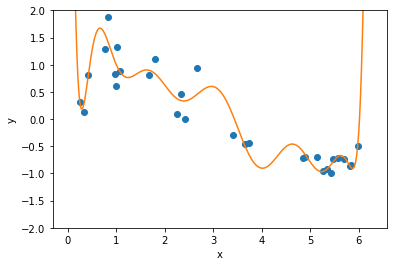

In [4]:
# Plot the data together with the fit.

x_pts = np.arange(0,2*np.pi,0.01)
y_fit = yhat(x_pts, beta_list)

plt.plot(x_data, y_data, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_pts, y_fit)
plt.ylim(-2,2);

How do we decide how good a fit like this is? To do this, we can use the mean squared error, which is the average squared distance between the data points and the curve at each x value in the dataset:
$$
\mathrm{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}(x_i))^2,
$$
where $(x_i, y_i)$ denotes one of the data points, and $\hat{y}(x)$ is the curve that fits the data. If the MSE is close to zero, then the curve is doing a good job of fitting the data.

**Exercise 1** (3 points): Create a function `mse(x, y, p)` that fits a polynomial of order `p` to data `x` and `y` and returns the mean squared error from the fit.

In [5]:
## Solution ##



**Exercise 2** (3 points): For the data that we generated above, make a plot of the MSE for different values of $p$. Make sure to label the axes appropriately. You should find that the MSE decreases as $p$ increases.

In [6]:
## Solution ##



In class, we found that, although higher-order polynomials may fit the data very well, they typically won't do a great job at describing new data that was not used for the fit. The idea of **cross validation** is to split the data into a **training set** and a **testing set**. The training set is used for fitting, and the testing set is used to quantify the goodness of the fit.

**Exercise 3** (5 pts): Create a new version of the function from the previous exercise. Call this function `mse_cv(x, y, p)`, which takes the same arguments as before. In this version, use the first half of the `x` and `y` data to perform the fit with a polynomial of order `p`. Compute the MSE using this first half of the data (the "training set"), then separately compute the MSE using the "held out" second half of the data (the "testing set"). Have the function return both MSE values. Finally, make a plot showing both the training MSE and the testing MSE for different values of $p$, using a legend to show which curve is which, and report the order of the polynomial that gives the optimal fit using cross-validation.

In [7]:
## Solution ##

